In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

c:\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


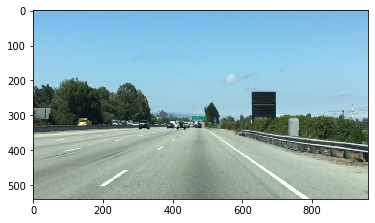

In [3]:
image=img.imread(r"D:\Downloads\test.jpg")
plt.imshow(image)

In [4]:
ysize=image.shape[0]
xsize=image.shape[1]
region_select=np.copy(image)

In [47]:
left_bottom=[0,539]
right_bottom=[900,539]
apex=[475,320]

In [48]:
fit_left=np.polyfit((left_bottom[0],apex[0]),(left_bottom[1],apex[1]),1)
fit_right=np.polyfit((right_bottom[0],apex[0]),(right_bottom[1],apex[1]),1)
fit_bottom=np.polyfit((left_bottom[0],right_bottom[0]),(left_bottom[1],right_bottom[1]),1)

In [49]:
XX,YY=np.meshgrid(np.arange(0,xsize),np.arange(0,ysize))

In [50]:
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [51]:
region_select[region_thresholds]=[255,0,0]

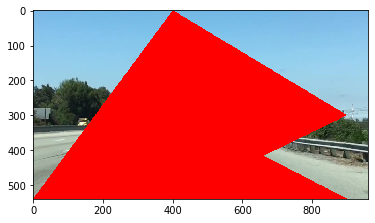

In [52]:
plt.imshow(region_select)

## COLOR + REGION SELECT

In [59]:
color_select=np.copy(image)

In [62]:
line_image=np.copy(image)

In [54]:
red_threshold=200
blue_threshold=200
green_threshold=200
rgb_thresholds=[red_threshold,blue_threshold,green_threshold]

In [58]:
color_threshold=(image[:,:,0]<rgb_thresholds[0]) \
                |(image[:,:,1]<rgb_thresholds[1]) \
                |(image[:,:,2]<rgb_thresholds[2])

In [60]:
color_select[color_threshold]=[0,0,0]

In [63]:
line_image[~color_threshold & region_thresholds]=[255,0,0]

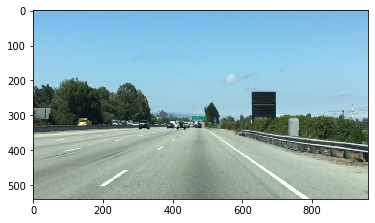

In [64]:
plt.imshow(image)

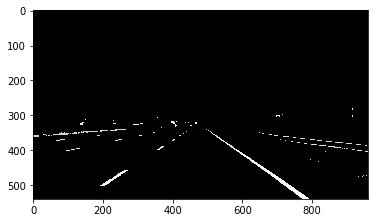

In [65]:
plt.imshow(color_select)

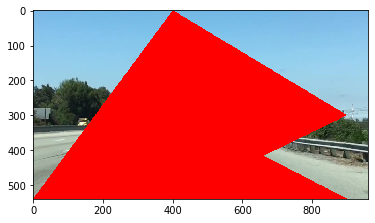

In [66]:
plt.imshow(region_select)

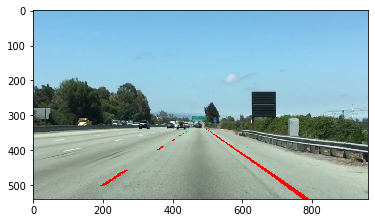

In [67]:
plt.imshow(line_image)